In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
#import the Diabetes dataset    
db = pd.read_csv("diabetes.csv")

In [2]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X = db.drop('Outcome', axis=1)
y = db.Outcome
print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")
pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'X' shape: (768, 8)
'y' shape: (768,)


In [3]:
# split the training data into training and validation set
X_train1,X_val,Y_train1,Y_val = train_test_split(X_train,y_train,test_size = 0.125 ,random_state = 42)
print(len(X_train1))
print(len(Y_val))

537
77


In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def print_score(clf, X_train1, Y_train1, X_val, Y_val, train=True):
    if train:
        pred = clf.predict(X_train1)
        clf_report = pd.DataFrame(classification_report(Y_train1, pred, output_dict=True))
        print("Train Result:n================================================")
        print(f"Accuracy Score: {accuracy_score(Y_train1, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(Y_train1, pred)}n")
    elif train==False:
        pred = clf.predict(X_val)
        clf_report = pd.DataFrame(classification_report(Y_val, pred, output_dict=True))
        print("Test Result:n================================================")        
        print(f"Accuracy Score: {accuracy_score(Y_val, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(Y_val, pred)}n")

In [5]:
from sklearn.svm import LinearSVC
model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train1, Y_train1)
print_score(model, X_train1, Y_train1, X_val, Y_val, train=True)
print_score(model, X_train1, Y_train1, X_val, Y_val, train=False)

Train Result:n================================================
Accuracy Score: 65.18%
_______________________________________________
CLASSIFICATION REPORT:n                    0           1  accuracy   macro avg  weighted avg
precision    0.650467    1.000000  0.651769    0.825234      0.773487
recall       1.000000    0.010582  0.651769    0.505291      0.651769
f1-score     0.788222    0.020942  0.651769    0.404582      0.518174
support    348.000000  189.000000  0.651769  537.000000    537.000000
_______________________________________________
Confusion Matrix: n [[348   0]
 [187   2]]n
Test Result:n================================================
Accuracy Score: 68.83%
_______________________________________________
CLASSIFICATION REPORT:n                   0     1  accuracy  macro avg  weighted avg
precision   0.688312   0.0  0.688312   0.344156      0.473773
recall      1.000000   0.0  0.688312   0.500000      0.688312
f1-score    0.815385   0.0  0.688312   0.407692      0.5612

C:\Users\ANKUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ANKUR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANKUR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANKUR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

In [6]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_val = scaler.transform(X_val)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
scaler = StandardScaler()
X_train1 = pca.fit_transform(X_train1)
X_val = pca.transform(X_val)
X_train1 = scaler.fit_transform(X_train1)
X_val = scaler.transform(X_val)

Text(0, 0.5, 'Second Principal Component')

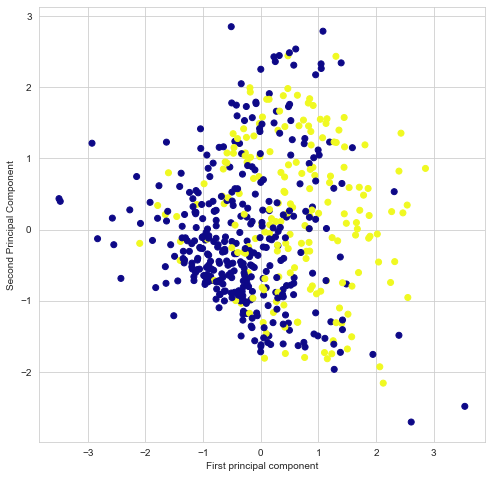

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(X_train1[:,0],X_train1[:,1],c=Y_train1,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')